In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='label'>

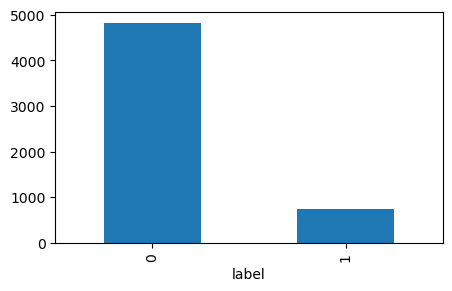

In [35]:
plt.figure(figsize=(5, 3))
df.label.value_counts().plot(kind='bar')


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42, shuffle=True)

len(X_train), len(X_test)

(4457, 1115)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [20]:
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Model score', pipeline.score(X_train, y_train))
    print('Accuracy: ', accuracy)
    print(classification_report(y_test, y_pred))
    
    return pipeline, accuracy

In [24]:
models = [
    MultinomialNB(),
    BernoulliNB(),
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    OneVsRestClassifier(SVC(random_state=42))
]

In [25]:
best_model = None
best_accuracy = 0
for model in models:
    print(model)
    pipeline, accuracy = train_model(X_train, y_train, X_test, y_test, model)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    print('\n\n')
    

MultinomialNB()
Model score 0.9728516939645502
Accuracy:  0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115




BernoulliNB()
Model score 0.9878842270585596
Accuracy:  0.9748878923766816
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115




SVC(random_state=42)
Model score 0.99798070450976
Accuracy:  0.9820627802690582
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965

SVC and OneVsRestClassifier(SVC) are the best models and also have same performance.

Hence we can choose any of them.

SVC is faster than OneVsRestClassifier(SVC).

So we will choose SVC model.

In [26]:
# Saving the best model
import pickle

with open('spam_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [27]:
# Loading the model
with open('spam_model.pkl', 'rb') as f:
    spam_model = pickle.load(f)


In [28]:
spam_model.predict(['Hello, how are you?'])

array([0], dtype=int64)

In [29]:
spam_model.predict(['Congratulations! You have won a free ticket to the Bahamas. Text "WIN" to 12345 to claim your prize.'])

array([1], dtype=int64)

In [30]:
spam_model.predict(['Hello, I am interested in your product. Please send me more information.'])

array([0], dtype=int64)

In [32]:
spam_model.predict(['You have been selected for a free trial of our new product. Click here to claim your prize.'])

1

In [33]:
%%writefile spam_model.py

import pickle

def load_model():
    with open('spam_model.pkl', 'rb') as f:
        spam_model = pickle.load(f)
    return spam_model

def predict(message):
    spam_model = load_model()
    prediction = spam_model.predict([message])[0]
    return 'Spam' if prediction == 1 else 'Not Spam'

if __name__ == '__main__':
    message = input('Enter a message: ')
    print(predict(message))
    

Writing spam_model.py
